In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show, adjust_band
import pandas as pd

In [2]:
site_names = ['Haworth_final_adj_5mpp_surf.tif'] # put the names of the sites here

Haworth_final_adj_5mpp_surf.tif opened


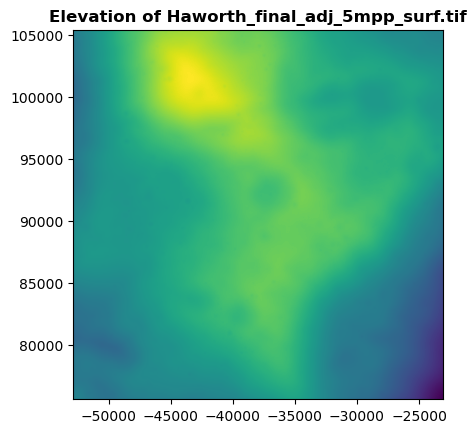

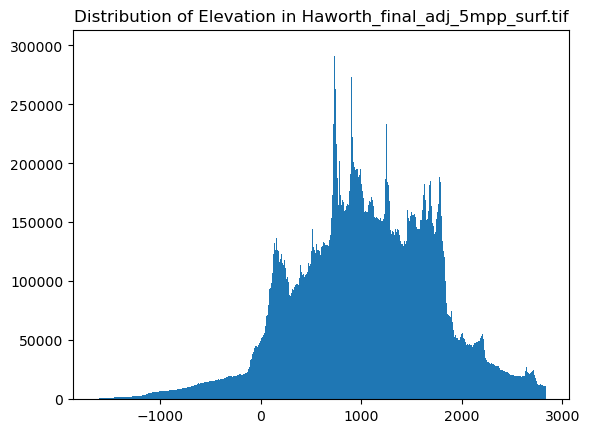

                  0
count  3.552160e+07
mean   1.039324e+03
std    6.871302e+02
min   -1.642901e+03
25%    5.841916e+02
50%    1.032986e+03
75%    1.549237e+03
max    2.842214e+03




In [3]:
GTIFF_SKIP_PACKBITS_DECODE_ERROR = True
d_i = np.array([])
for i, site in enumerate(site_names):
    with rasterio.open(site, 'r') as df_i:
        #this is the pdf we're gonna save to

        print(site.strip(), "opened")
        show(df_i, title='Elevation of '+site)
        d_i = np.array(df_i.read(1))
        transform = df_i.transform 

        #plt.plot(d_i)
        #plt.title(f"Slopes in {site.strip()}")
        #plt.show()

        plt.hist(d_i.ravel(), bins=500)
        plt.title(f"Distribution of Elevation in {site}")
        plt.show()

        df_describe = pd.DataFrame(d_i.ravel())
        print(df_describe.describe())

        # make mesh of surface?

        print()
        print()

In [4]:
from rasterio.transform import xy

In [25]:
maps = []
x_coordinates = []
y_coordinates = []
x_s, y_s, map_s = [], [], []
for x in range(10):
    smaller = []
    scat = []
    for i, row in enumerate(d_i):
        if (i % 10 == x):
            tmp_row = []
            for j in range(d_i.shape[0]):
                if j % 10 == x:
                    tmp_row.append(d_i[i][j])
            smaller.append(tmp_row)
        if (x == 0 and i % 100 == x):
            tmp_row = []
            for j in range(d_i.shape[0]):
                if j % 100 == x:
                    tmp_row.append(d_i[i][j])
            map_s.append(tmp_row)
    map_s = np.array(map_s)
    r, c = map_s.shape
    x_s, y_s = np.meshgrid(
        100 * np.arange(r), 
        100 * np.arange(c)
    )
    
    smaller = np.array(smaller)
    rows, cols = smaller.shape

    x_coords, y_coords = np.meshgrid(
        10 * np.arange(rows) + x, 
        10 * np.arange(cols) + x
    )
    x_coordinates.append(x_coords)
    y_coordinates.append(y_coords)
    maps.append(smaller)
maps = np.array(maps)
x_coordinates = np.array(x_coordinates)
y_coordinates = np.array(y_coordinates)


In [23]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'bone',
         'pink', 'spring', 'summer', 'autumn']

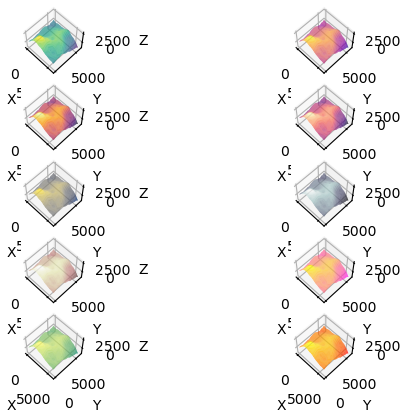

In [24]:
plt.figure(0)
for i in range(5):
    for j in range(2):
        ax2 = plt.subplot2grid((5,2), (i,j), projection='3d')
        ax2.plot_surface(x_coordinates[i *2 + j], y_coordinates[i *2 + j], maps[i *2 + j], cmap=cmaps[i *2 + j], edgecolor='none')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')
        ax2.view_init(elev=60., azim=-45, roll=0)
plt.show()

In [8]:
print(x_coordinates.shape, y_coordinates.shape, maps.shape)
import matplotlib
print(matplotlib.get_backend())
#matplotlib.use('qtagg')
print(matplotlib.get_backend())


(10, 596, 596) (10, 596, 596) (10, 596, 596)
module://matplotlib_inline.backend_inline
module://matplotlib_inline.backend_inline


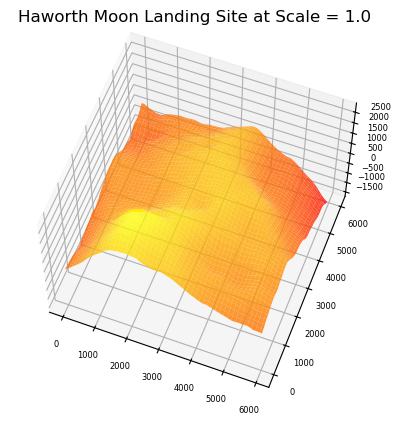

In [57]:
fig = plt.figure()
ax2 = fig.add_subplot(projection="3d")


ax2.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='minor', labelsize=6)

frame = 596
surf = ax2.plot_surface(x_coordinates[frame % 10][:frame + 2,:frame + 2], 
                                y_coordinates[frame % 10][:frame + 2,:frame + 2], 
                                maps[frame % 10][:frame + 2,:frame + 2], 
                                cmap=cmaps[int((frame / 10 ) % 10)], 
                                edgecolor="none", 
                                alpha = 0.8)
#scat = ax2.scatter(x_s, y_s, map_s, edgecolor="none")
ax2.view_init(elev=frame / 10.0, azim= -frame / 5.0 + 50, roll= 0)
plt.show()

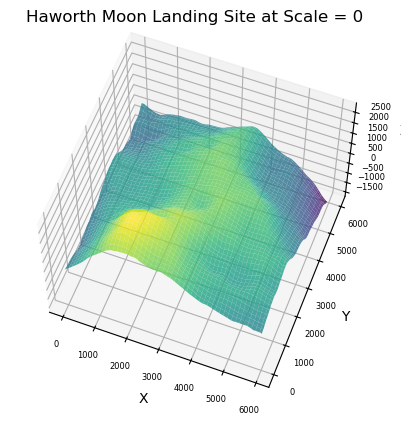

In [65]:
import matplotlib.animation as animation
fig = plt.figure()
ax2 = fig.add_subplot(projection="3d")

# Initialize the surface plot
ax2.set_title(str('Haworth Moon Landing Site at Scale = ' + str(int(596 / 1))))

surf = ax2.plot_surface(
    x_coordinates[0], y_coordinates[0], maps[0], cmap=cmaps[0], edgecolor="none", alpha = 0.8
)

ax2.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='minor', labelsize=6)

#scat = ax2.scatter(x_s, y_s, map_s, edgecolor="none")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=60.0, azim=-45, roll=0)

# Update function for animation
def update(frame):
    global surf
    if frame != 0:
        ax2.set_title(str('Haworth Moon Landing Site at Scale = ' + str(int(596 / frame))))
    if (frame <= 596):
        surf.remove()
        surf = ax2.plot_surface(x_coordinates[frame % 10][:frame + 2,:frame + 2], 
                                y_coordinates[frame % 10][:frame + 2,:frame + 2], 
                                maps[frame % 10][:frame + 2,:frame + 2], 
                                cmap=cmaps[int((596 / (frame + 1)) % 10)], 
                                edgecolor="none", 
                                alpha = 0.8)
        #scat = ax2.scatter(x_s, y_s, map_s, edgecolor="none")
        ax2.view_init(elev=frame / 10.0, azim= -frame / 5.0 + 50, roll= 0)


# Create the animation
anim = animation.FuncAnimation(fig=fig, func=update, frames=626, interval=500)

# embedding for the video 
writervideo = animation.FFMpegWriter(fps=30) 
anim.save('moonmaps.mp4', writer=writervideo) 
plt.show()
plt.close() 
